In [3]:
import immas
from immas.features import localBinaryPatterns
import cv2
from immas.features.binarization import get_candidates_mask
from immas.basic_functions import show_image_plt
from immas import MammogramImage
from immas.classification import get_rois
import matplotlib.pyplot as plt

import numpy as np

In [15]:
# import image
path_image = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.png"
path_ground_truth = "../dataset/groundtruth/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
pectoral_muscle = "../dataset/pectoral_muscle_masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"

mm = MammogramImage(path_image, path_mask, ground_truth_path=path_ground_truth, pmuscle_mask_path=pectoral_muscle)


C:\Users\dono_\Anaconda3\envs\immas\lib\site-packages\immas-1.0-py3.6.egg\immas\segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars


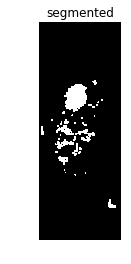

In [5]:
# segment image
img_thresh = get_candidates_mask(mm.image_data)
show_image_plt(img_thresh,'segmented')

In [6]:
# extract regions
min_area = 2500
contour_max_number = 10
regions_tpr, regions_fpr = get_rois(img_thresh)

number_of_masses = len(regions_fpr)

# select only contours with area higher than min area
regions_fpr = [c for c in regions_fpr if cv2.contourArea(c["contour"]) > min_area]
# sort obtained contours by area in descending order
regions_fpr.sort(key=lambda c: cv2.contourArea(c["contour"]), reverse=True)

# how many contours should we investigate
if (contour_max_number is None) or (len(regions_fpr) < contour_max_number):
    # in case we do not have enough contours in our image
    # or we do not want to limit the number of contours to select
    # we do not need to change controus array in this case
    contour_max_number = len(regions_fpr)
else:
    # select biggest contours, according to provided max number of contours
    regions_fpr = regions_fpr[:contour_max_number]

arr_features = None

In [8]:
contour = regions_fpr[3]["contour"]
img = mm.image_data

In [21]:
#Local binary patterns computation from contour

In [11]:
# generate local binary patterns
# compute region of interest
roi = localBinaryPatterns.get_roi_resizing(img,contour)
# lbp 
lbp_features = localBinaryPatterns.get_LBP(roi)


In [12]:
print(lbp_features)

{'LBP0': 0.12, 'LBP1': 0.24, 'LBP2': 0.16, 'LBP3': 0.04, 'LBP4': 0.08, 'LBP5': 0.2, 'LBP6': 0.04, 'LBP7': 0.04, 'LBP8': 0.0, 'LBP9': 0.08, 'LBP10': 0.08, 'LBP11': 0.12, 'LBP12': 0.24, 'LBP13': 0.16, 'LBP14': 0.24, 'LBP15': 0.04, 'LBP16': 0.04, 'LBP17': 0.04, 'LBP18': 0.0, 'LBP19': 0.04, 'LBP20': 0.08, 'LBP21': 0.16, 'LBP22': 0.2, 'LBP23': 0.16, 'LBP24': 0.24, 'LBP25': 0.08, 'LBP26': 0.0, 'LBP27': 0.04, 'LBP28': 0.0, 'LBP29': 0.04, 'LBP30': 0.16, 'LBP31': 0.16, 'LBP32': 0.16, 'LBP33': 0.12, 'LBP34': 0.08, 'LBP35': 0.08, 'LBP36': 0.0, 'LBP37': 0.04, 'LBP38': 0.04, 'LBP39': 0.16, 'LBP40': 0.04, 'LBP41': 0.2, 'LBP42': 0.2, 'LBP43': 0.12, 'LBP44': 0.2, 'LBP45': 0.12, 'LBP46': 0.08, 'LBP47': 0.0, 'LBP48': 0.0, 'LBP49': 0.04, 'LBP50': 0.12, 'LBP51': 0.2, 'LBP52': 0.16, 'LBP53': 0.16, 'LBP54': 0.04, 'LBP55': 0.08, 'LBP56': 0.04, 'LBP57': 0.04, 'LBP58': 0.04, 'LBP59': 0.12, 'LBP60': 0.16, 'LBP61': 0.2, 'LBP62': 0.04, 'LBP63': 0.12, 'LBP64': 0.04, 'LBP65': 0.08, 'LBP66': 0.08, 'LBP67': 0.12, 'LB